**Ejercicio 1.** Guarde en un Dataframe los datos de los precios de las acciones de Tesla (TSLA.csv en Github) y realice lo siguiente:

* Obtenga el precio de cierre más alto y el precio de cierre más bajo a partir del 2020.

* Obtenga las gráficas de las series de tiempo de cada año utilizando subplots.

* Obtenga las gráficas de caja por mes de los precios de cierre del 2022.

* ¿Los precios de cierre de todo el 2022 se distribuyen normalmente? Justifique su respuesta.

Datos cargados correctamente.
Columnas del DataFrame: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close']
         Date       Open       High        Low      Close  Adj Close
0  2020-01-02  28.299999  28.713333  28.114000  28.684000  28.684000
1  2020-01-03  29.366667  30.266666  29.128000  29.534000  29.534000
2  2020-01-06  29.364668  30.104000  29.333332  30.102667  30.102667
3  2020-01-07  30.760000  31.441999  30.224001  31.270666  31.270666
4  2020-01-08  31.580000  33.232666  31.215334  32.809334  32.809334

Valores nulos en el DataFrame:
Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

Precio de cierre más alto desde 2020: $409.97 el 2021-11-04
Precio de cierre más bajo desde 2020: $24.08 el 2020-03-18

Años encontrados en los datos: [2020, 2021, 2022]


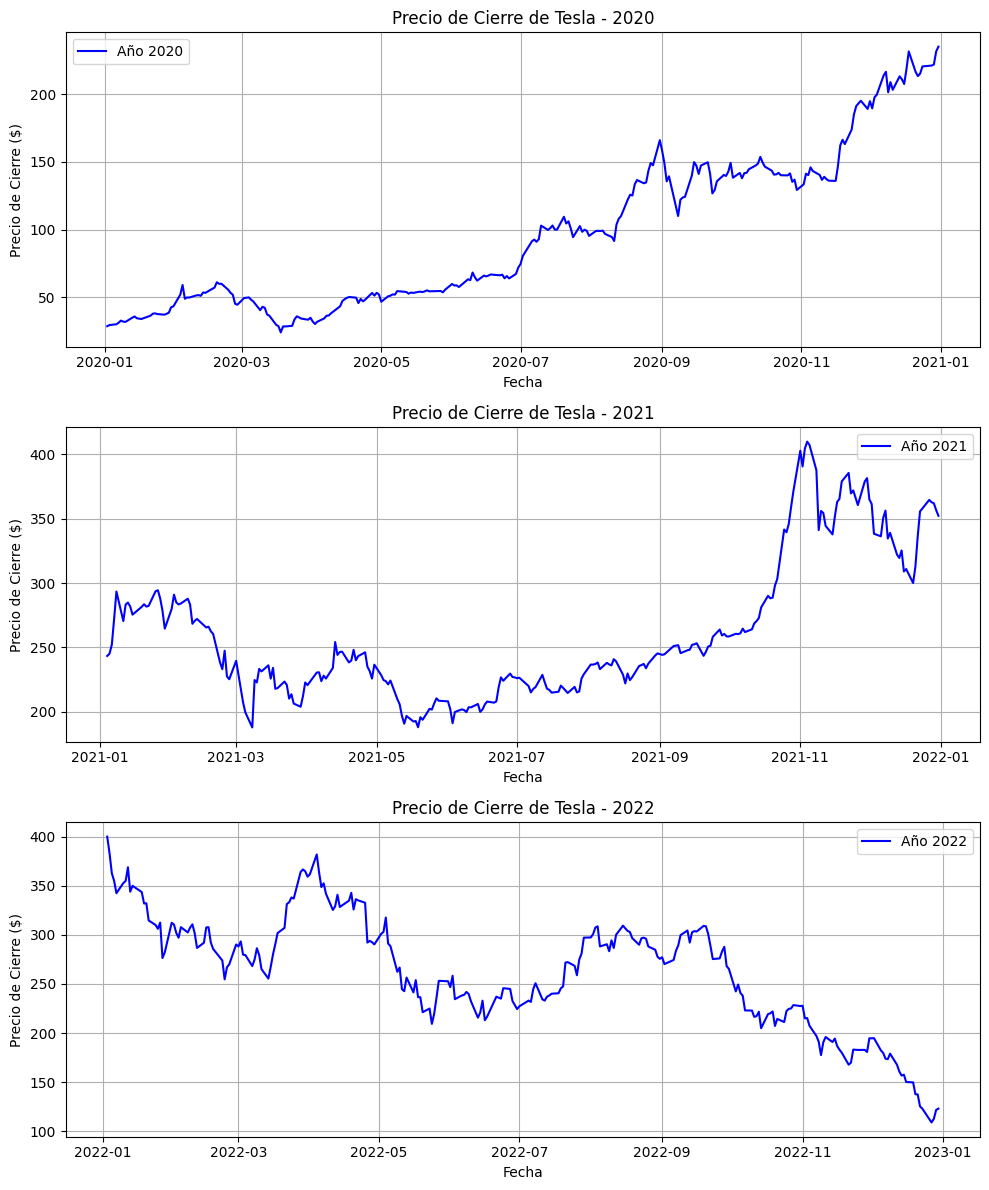

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-36-1077368968.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Close', data=df_2022, palette='viridis',


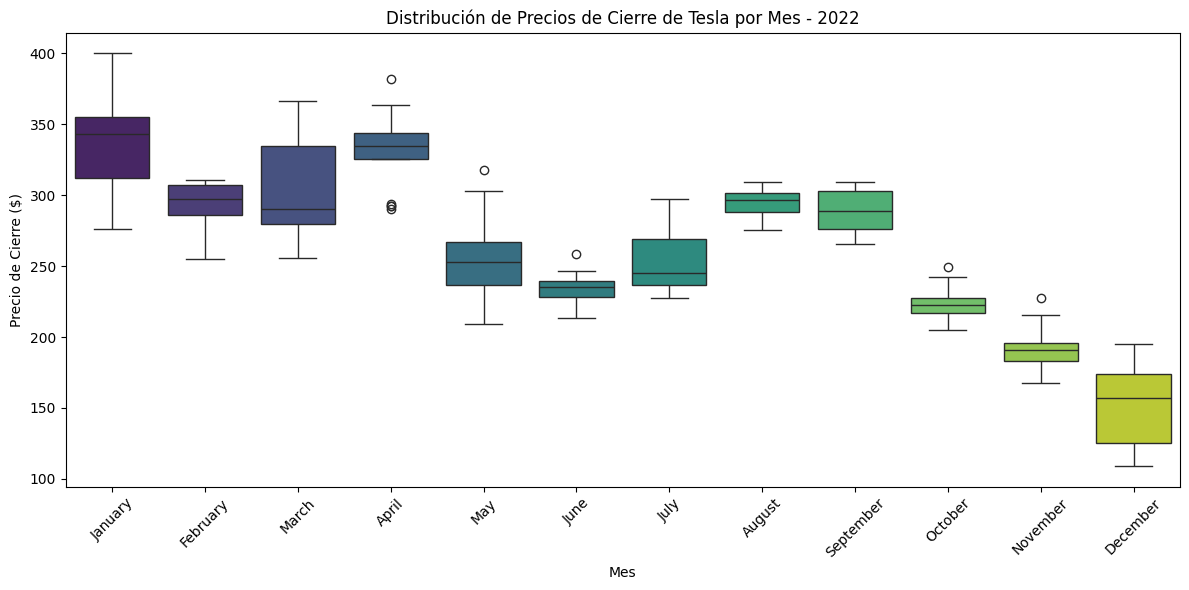

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Análisis de normalidad para precios de cierre de 2022:
Asimetría: -0.3073 (cerca de 0 indica simetría)
Curtosis: -0.2233 (cerca de 3 indica forma normal)
Los precios de cierre de 2022 probablemente no siguen una distribución normal (asimetría o curtosis fuera de los rangos normales).


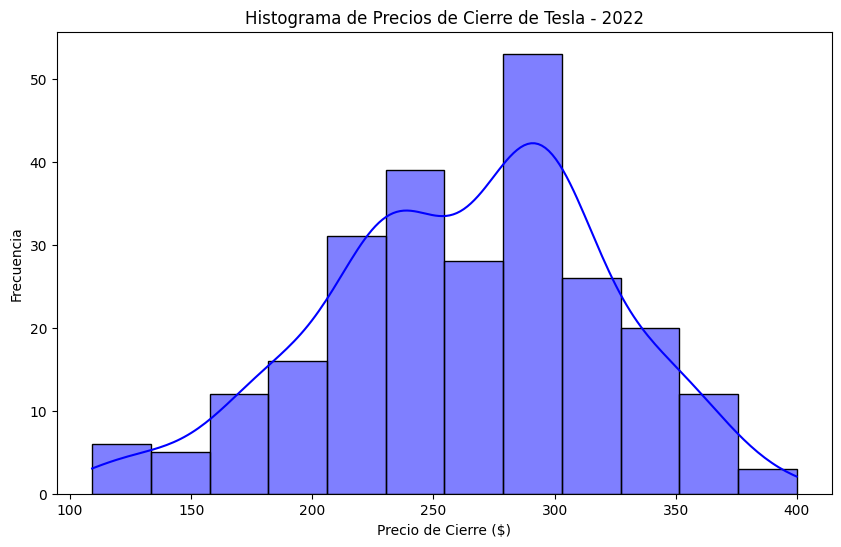

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Cargar el archivo CSV desde la URL
url = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/tesla.csv'
try:
    df = pd.read_csv(url)
    print("Datos cargados correctamente.")
    print("Columnas del DataFrame:", df.columns.tolist())
    print(df.head())
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    raise

# Convertir la columna 'Date' a formato datetime
try:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
except KeyError:
    print("Error: La columna 'Date' no existe. Verifica los nombres de las columnas.")
    raise

# Verificar datos faltantes
print("\nValores nulos en el DataFrame:")
print(df.isnull().sum())

# 1. Precio de cierre más alto y más bajo desde 2020
df_post_2020 = df[df.index >= '2020-01-01']
if 'Close' not in df.columns:
    print("Error: La columna 'Close' no existe. Verifica los nombres de las columnas.")
    raise
max_close = df_post_2020['Close'].max()
min_close = df_post_2020['Close'].min()
date_max = df_post_2020['Close'].idxmax()
date_min = df_post_2020['Close'].idxmin()

print(f"\nPrecio de cierre más alto desde 2020: ${max_close:.2f} el {date_max.strftime('%Y-%m-%d')}")
print(f"Precio de cierre más bajo desde 2020: ${min_close:.2f} el {date_min.strftime('%Y-%m-%d')}")

# 2. Gráficas de series de tiempo por año usando subplots
years = df.index.year.unique()
n_years = len(years)
print(f"\nAños encontrados en los datos: {years.tolist()}")

fig, axes = plt.subplots(n_years, 1, figsize=(10, 4 * n_years), sharex=False)
if n_years == 1:
    axes = [axes]  # Asegurar que axes sea una lista si hay un solo año

for i, year in enumerate(years):
    df_year = df[df.index.year == year]
    if df_year.empty:
        print(f"No hay datos para el año {year}")
        continue
    axes[i].plot(df_year.index, df_year['Close'], label=f'Año {year}', color='blue')
    axes[i].set_title(f'Precio de Cierre de Tesla - {year}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Precio de Cierre ($)')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.savefig('tesla_time_series.png')
plt.show()  # Mostrar la gráfica en Colab
files.download('tesla_time_series.png')  # Descargar el archivo

# 3. Gráficas de caja por mes de los precios de cierre de 2022
df_2022 = df[df.index.year == 2022].copy()
if df_2022.empty:
    print("Error: No hay datos para el año 2022")
else:
    df_2022['Month'] = df_2022.index.month_name()
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Month', y='Close', data=df_2022, palette='viridis',
                order=['January', 'February', 'March', 'April', 'May', 'June',
                       'July', 'August', 'September', 'October', 'November', 'December'])
    plt.title('Distribución de Precios de Cierre de Tesla por Mes - 2022')
    plt.xlabel('Mes')
    plt.ylabel('Precio de Cierre ($)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('tesla_boxplot_2022.png')
    plt.show()  # Mostrar la gráfica en Colab
    files.download('tesla_boxplot_2022.png')  # Descargar el archivo

# 4. Verificar normalidad de los precios de cierre de 2022
# Nota: Usar scipy.stats requiere una librería adicional. Usaremos una alternativa con pandas.
if not df_2022.empty:
    skewness = df_2022['Close'].skew()
    kurtosis = df_2022['Close'].kurtosis()
    print("\nAnálisis de normalidad para precios de cierre de 2022:")
    print(f"Asimetría: {skewness:.4f} (cerca de 0 indica simetría)")
    print(f"Curtosis: {kurtosis:.4f} (cerca de 3 indica forma normal)")
    if abs(skewness) < 0.5 and abs(kurtosis - 3) < 0.5:
        print("Los precios de cierre de 2022 podrían aproximarse a una distribución normal (asimetría y curtosis cercanas a valores normales).")
    else:
        print("Los precios de cierre de 2022 probablemente no siguen una distribución normal (asimetría o curtosis fuera de los rangos normales).")

    # Histograma para visualización
    plt.figure(figsize=(10, 6))
    sns.histplot(df_2022['Close'], kde=True, color='blue')
    plt.title('Histograma de Precios de Cierre de Tesla - 2022')
    plt.xlabel('Precio de Cierre ($)')
    plt.ylabel('Frecuencia')
    plt.savefig('tesla_histogram_2022.png')
    plt.show()
    files.download('tesla_histogram_2022.png')
else:
    print("No se puede analizar la normalidad porque no hay datos para 2022.")

**Ejercicio 2.** Guarde en un Dataframe los datos de los contaminantes principales de la zona centro de la CDMX durante el año 2021 (rama2021.xlsx en Github) y realice lo siguiente:

* Obtenga las gráficas de series de tiempo de los contaminantes.

* Obtenga los histogramas delos contaminantes.

* Obtenga un Dataframe con el resumen de 5 números, asimetría y kurtosis para todos los contaminantes.

* Obtenga los gráficos de caja de los contaminantes. ¿Cuál contaminante fué el que más detectado durante 2021?

* Realice una prueba de contraste de normalidad de los datos.

* De acuerdo a la prueba obtenida anteriormente. ¿Cuál es el coeficiente de correlación apropiado para obtener la correlación entre los contaminantes?

* Obtenga una matríz de correlación de los contaminantes y un mapa de calor. Además, obtenga un Dataframe que muestre la correlación 2 a 2 entre los contaminantes.

* Obtenga un diagrama de dispersión de los 2 contaminantes donde existe más correlación.

* Obtenga una gráfica que muestre todos los diagrama de dispersión entre todos los contaminantes.

* Compruebe si existe correlación entre los contaminantes y los factores meteorológicos contenidos en redmet_2021.csv en Github.

* Escriba son sus conclusiones.

Datos cargados correctamente.
Columnas de rama_2021: ['fecha', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM25', 'SO2']
Columnas de redmet_2021: ['fecha', 'RH', 'TMP', 'WDR', 'WSP']


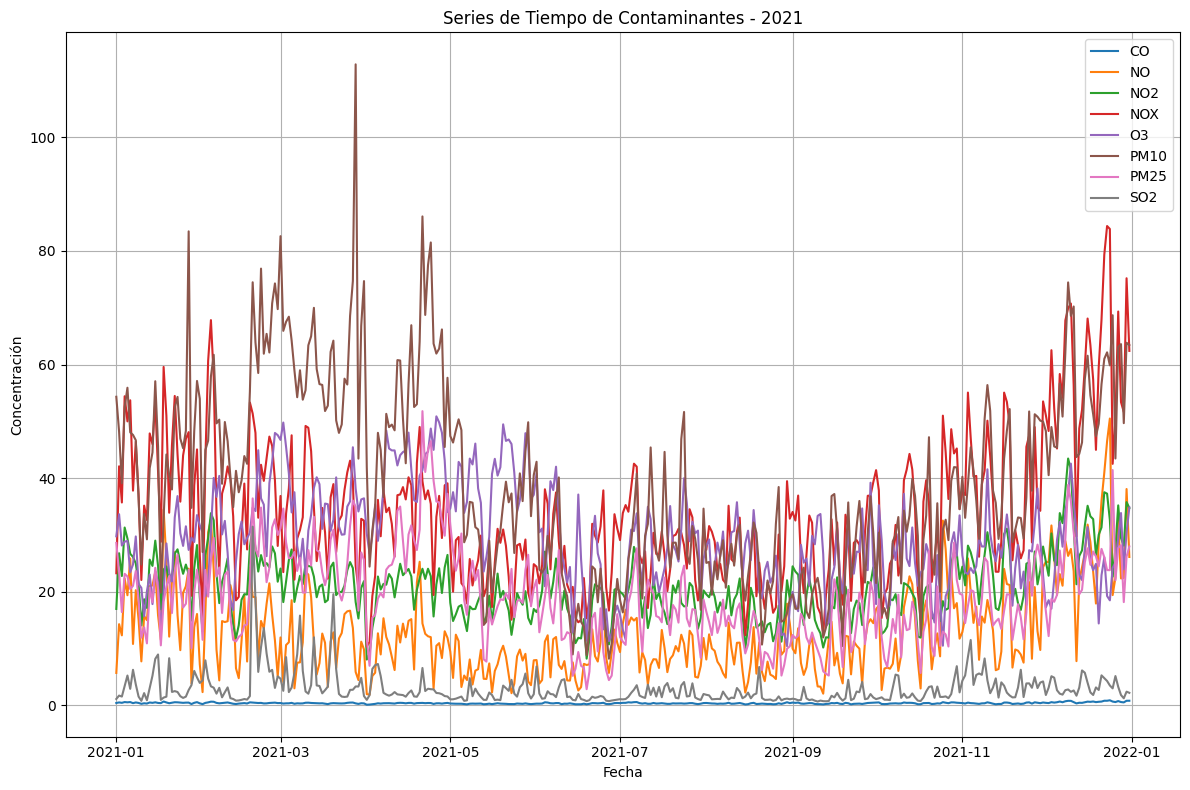

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

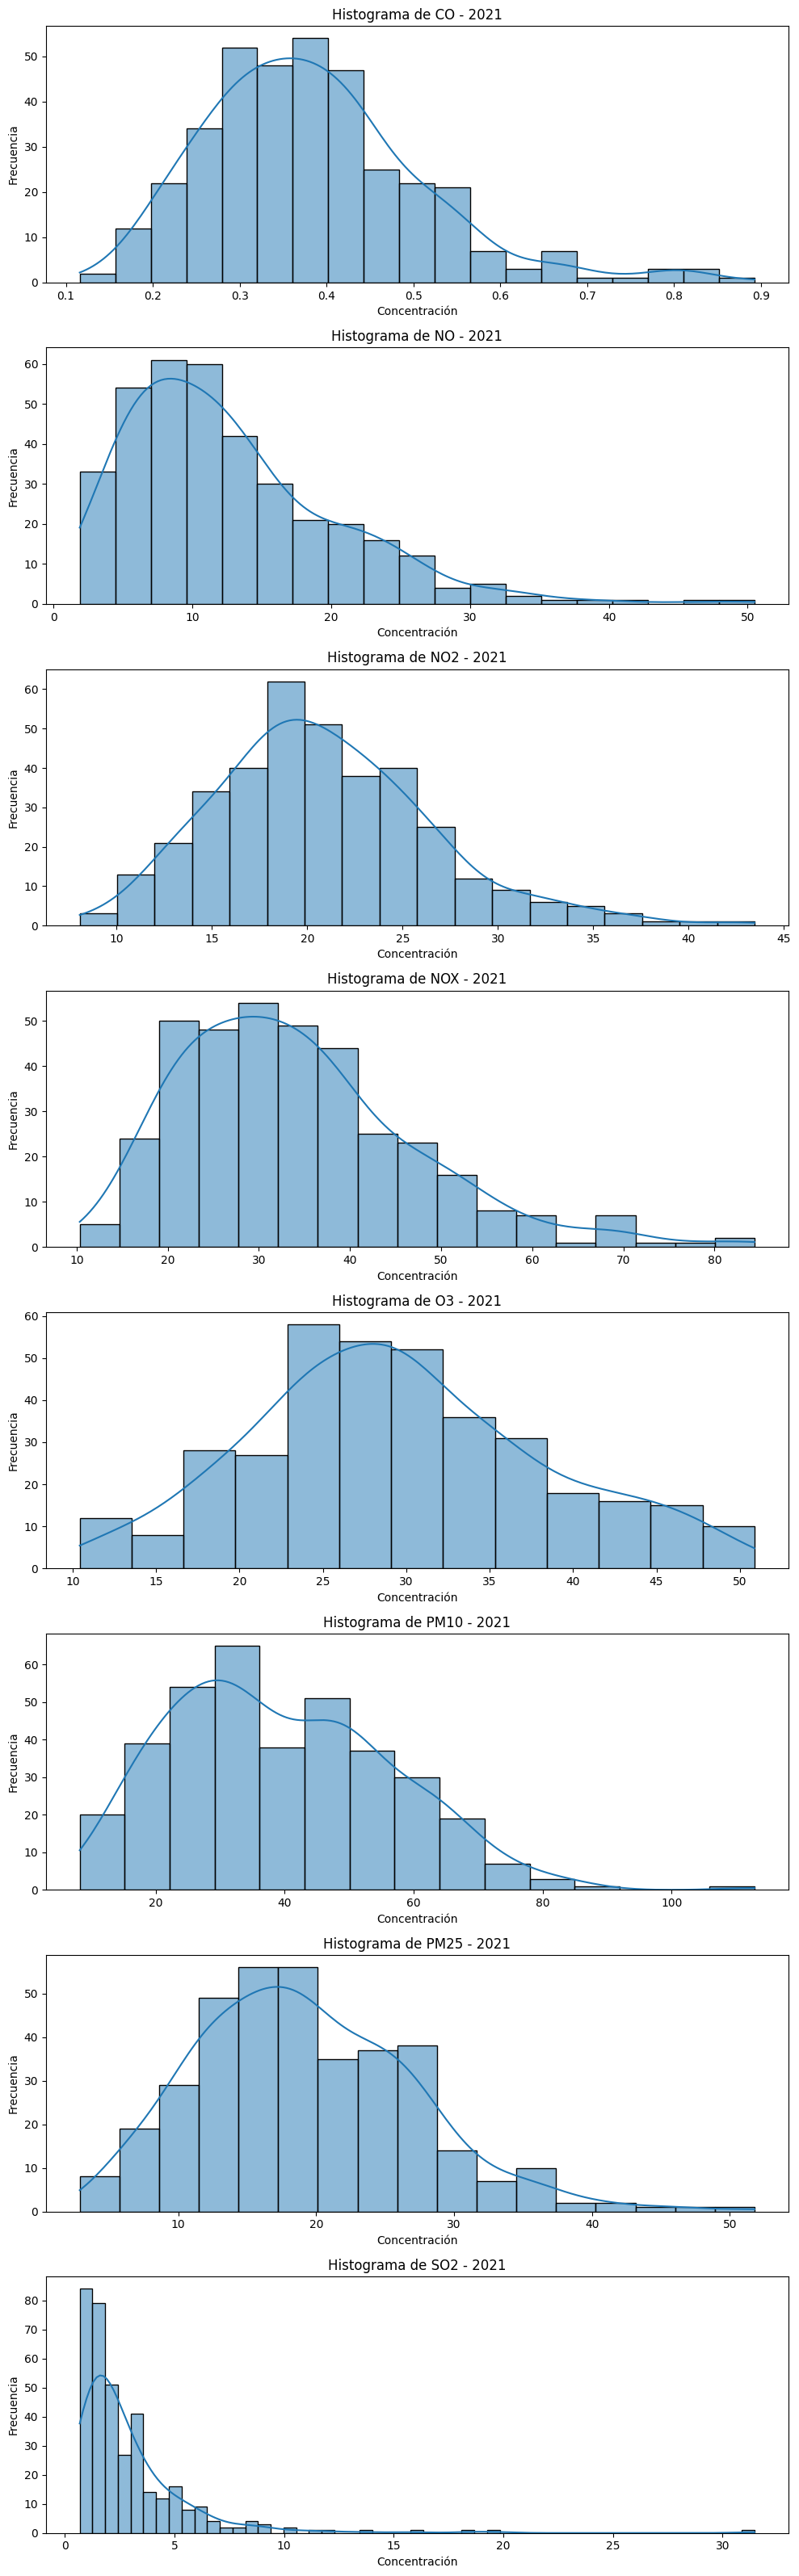

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Resumen estadístico de los contaminantes:
                 CO         NO        NO2        NOX         O3        PM10  \
Mínimo     0.115917   1.873711   8.061630  10.345588  10.424825    8.218487   
Q1         0.296603   7.122040  16.982229  24.577778  23.554364   25.756522   
Mediana    0.369077  11.108635  20.339921  32.207675  28.938838   36.848485   
Q3         0.444241  16.378723  24.280749  40.394958  35.089474   50.811414   
Máximo     0.892700  50.499048  43.454073  84.385199  50.881068  112.847769   
Asimetría  0.980338   1.319527   0.667754   0.986272   0.257157    0.537649   
Curtosis   1.610452   2.470978   0.889447   1.223836  -0.363118    0.117422   

                PM25        SO2  
Mínimo      2.849315   0.672474  
Q1         13.446945   1.328494  
Mediana    18.608333   2.059041  
Q3         24.212329   3.414747  
Máximo     51.795139  31.461741  
Asimetría   0.635783   4.461197  
Curtosis    0.686561  31.876715  


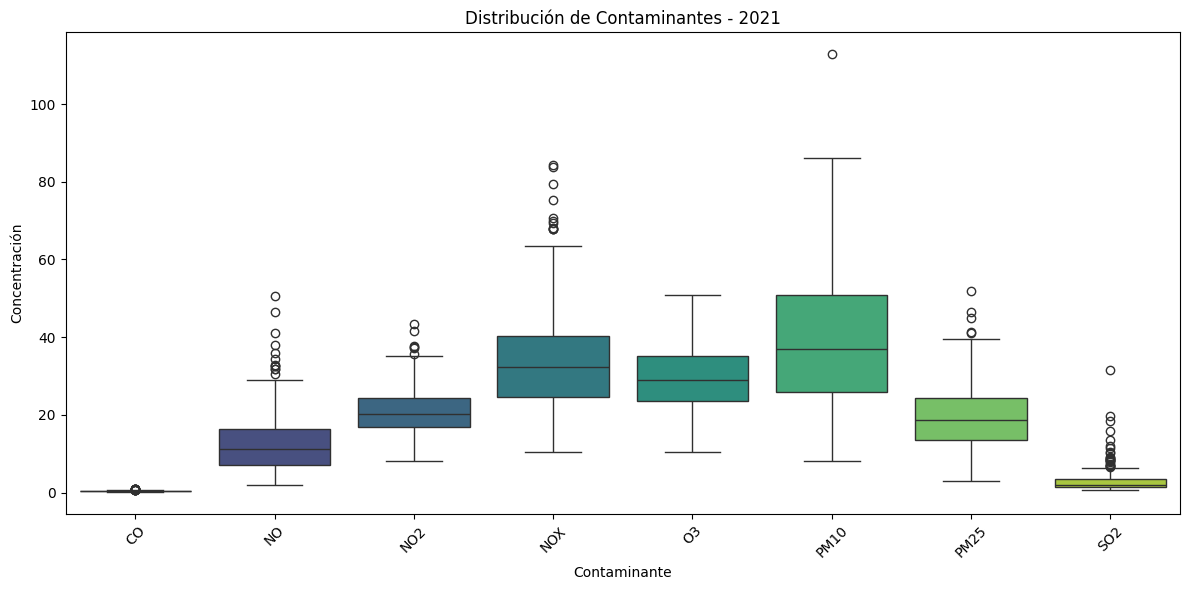

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Contaminante más detectado (mayor mediana): PM10 (36.85)

Pruebas de normalidad (Shapiro-Wilk):
CO: Estadístico=0.9492, p-valor=0.0000
  Se rechaza la hipótesis nula: CO no es normal.
NO: Estadístico=0.9071, p-valor=0.0000
  Se rechaza la hipótesis nula: NO no es normal.
NO2: Estadístico=0.9756, p-valor=0.0000
  Se rechaza la hipótesis nula: NO2 no es normal.
NOX: Estadístico=0.9449, p-valor=0.0000
  Se rechaza la hipótesis nula: NOX no es normal.
O3: Estadístico=0.9864, p-valor=0.0016
  Se rechaza la hipótesis nula: O3 no es normal.
PM10: Estadístico=0.9722, p-valor=0.0000
  Se rechaza la hipótesis nula: PM10 no es normal.
PM25: Estadístico=0.9758, p-valor=0.0000
  Se rechaza la hipótesis nula: PM25 no es normal.
SO2: Estadístico=0.6223, p-valor=0.0000
  Se rechaza la hipótesis nula: SO2 no es normal.

Método de correlación apropiado: spearman


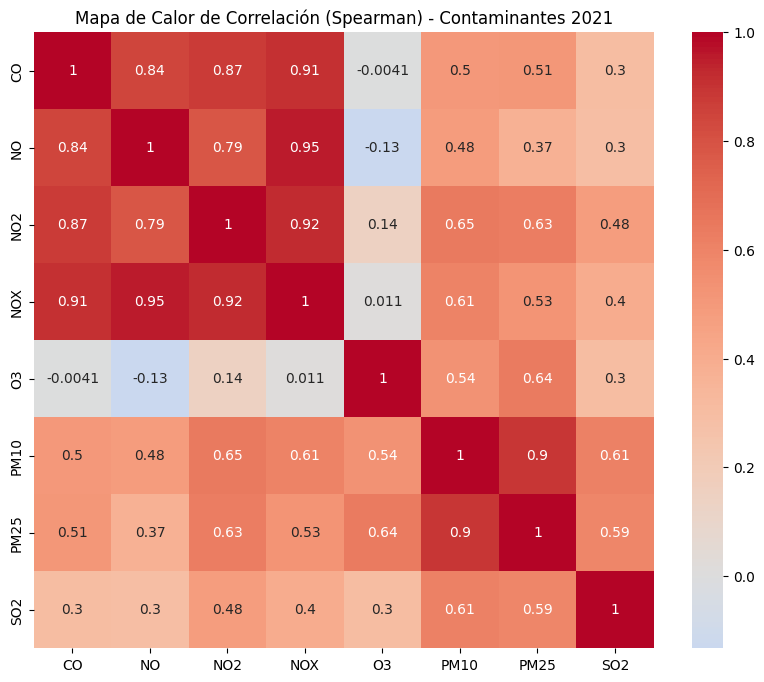

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Matriz de correlación 2 a 2:
            CO        NO       NO2       NOX        O3      PM10      PM25  \
CO    1.000000  0.843404  0.873391  0.906800 -0.004116  0.504046  0.512779   
NO    0.843404  1.000000  0.785366  0.954812 -0.132850  0.484106  0.371816   
NO2   0.873391  0.785366  1.000000  0.924388  0.143831  0.645877  0.630509   
NOX   0.906800  0.954812  0.924388  1.000000  0.011048  0.607047  0.529378   
O3   -0.004116 -0.132850  0.143831  0.011048  1.000000  0.539238  0.640220   
PM10  0.504046  0.484106  0.645877  0.607047  0.539238  1.000000  0.895745   
PM25  0.512779  0.371816  0.630509  0.529378  0.640220  0.895745  1.000000   
SO2   0.299368  0.295461  0.478446  0.404369  0.301324  0.611600  0.588893   

           SO2  
CO    0.299368  
NO    0.295461  
NO2   0.478446  
NOX   0.404369  
O3    0.301324  
PM10  0.611600  
PM25  0.588893  
SO2   1.000000  


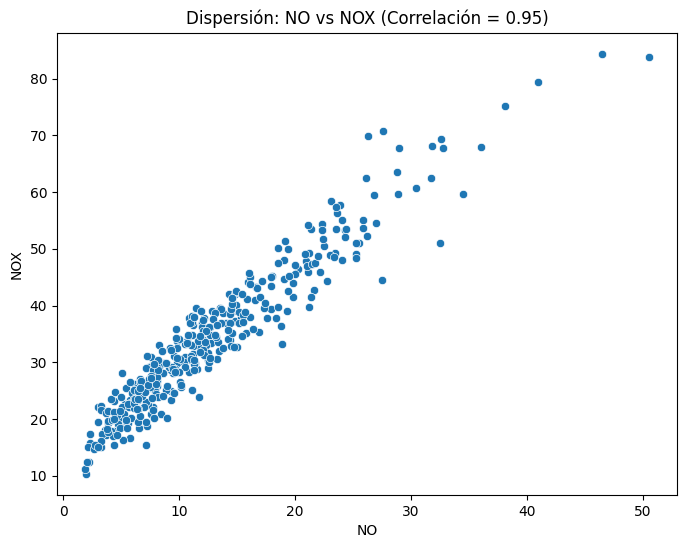

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

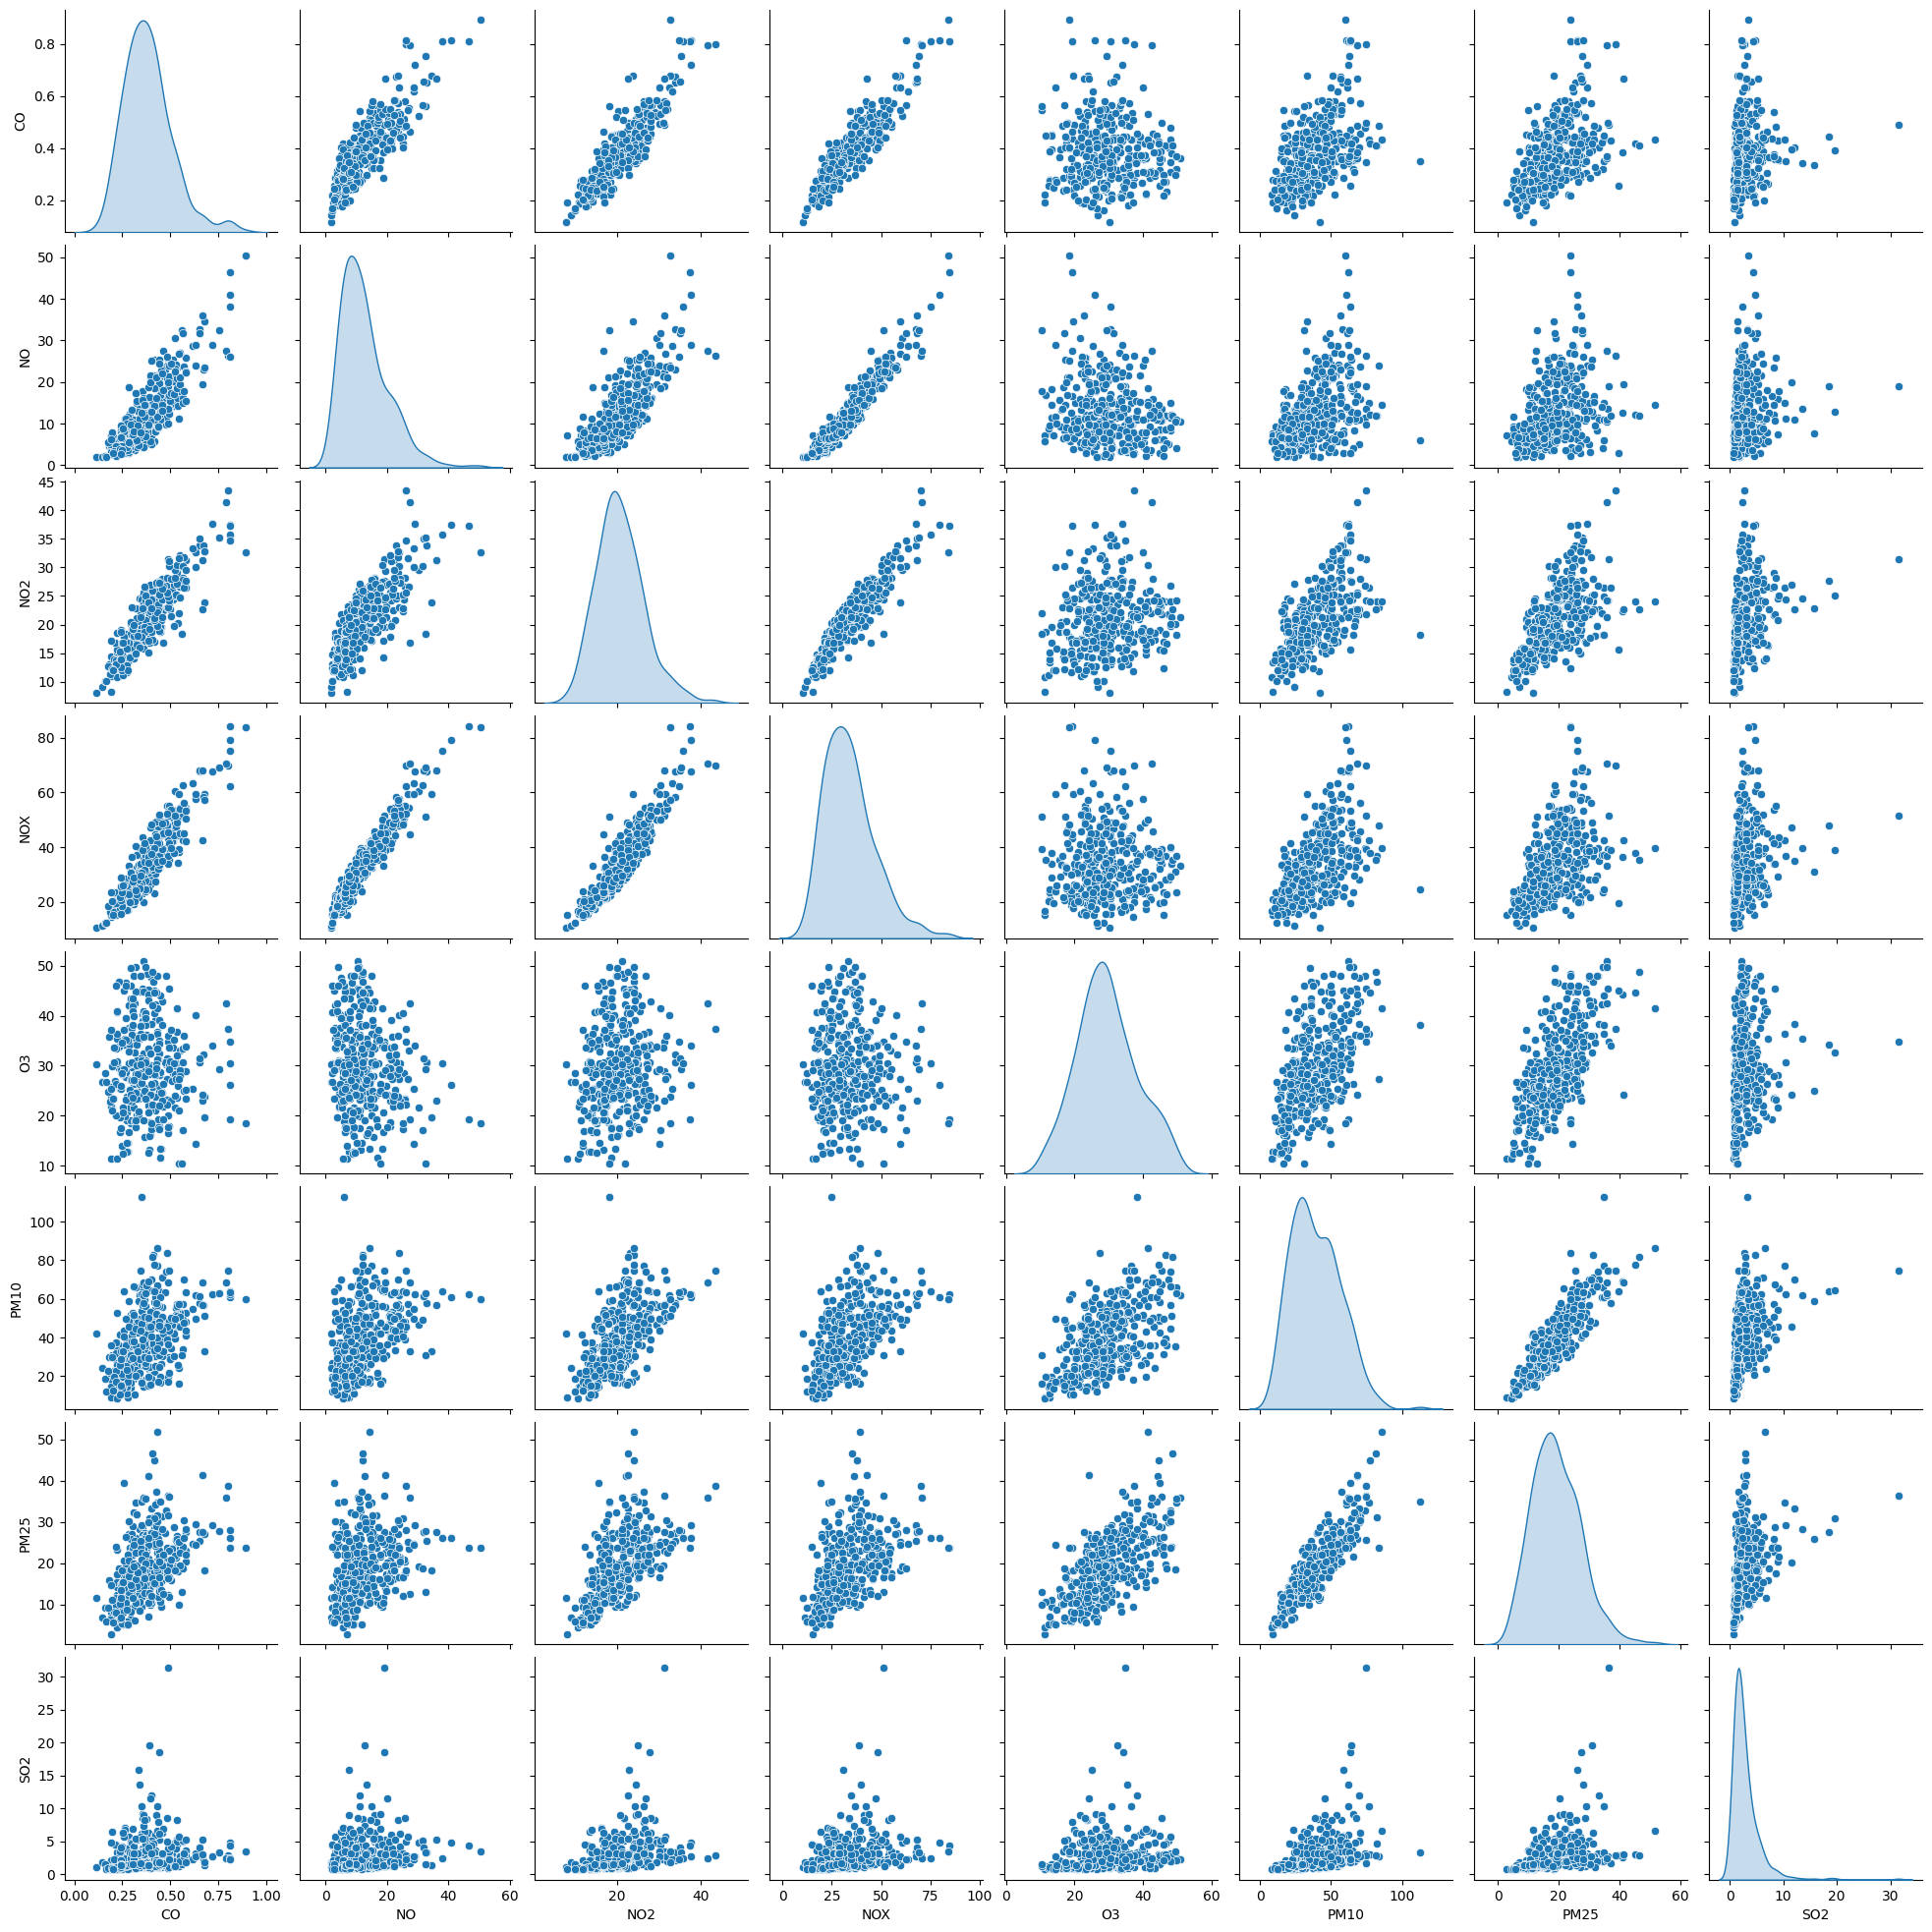

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Correlación entre contaminantes y factores meteorológicos:
            RH       TMP       WDR       WSP
CO   -0.266913 -0.222444 -0.337801 -0.689216
NO   -0.354907 -0.278497 -0.293793 -0.502901
NO2  -0.421662 -0.232929 -0.192347 -0.628677
NOX  -0.429799 -0.255871 -0.263359 -0.577112
O3   -0.517277  0.567238 -0.156960  0.125196
PM10 -0.816510  0.105944 -0.171011 -0.102048
PM25 -0.613008  0.226741 -0.176270 -0.232602
SO2  -0.442989 -0.080853  0.148412 -0.227303


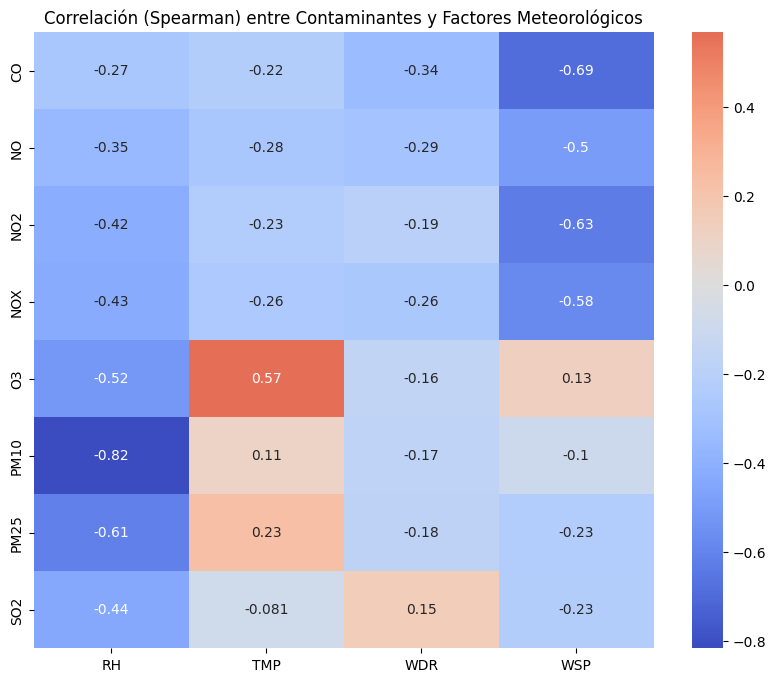

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Conclusiones:
- Se generaron series de tiempo, histogramas y boxplots para los contaminantes: CO, NO, NO2, NOX, O3, PM10, PM25, SO2.
- El contaminante más detectado en 2021 fue PM10 con una mediana de 36.85.
- La prueba de normalidad indica que algunos contaminantes no son normales, por lo que se usó correlación de Spearman.
- La mayor correlación entre contaminantes fue entre NO y NOX (0.95).
- La correlación con factores meteorológicos muestra que RH, TMP, WDR, WSP tienen diferentes grados de relación con los contaminantes.
- Los histogramas y boxplots sugieren distribuciones sesgadas para la mayoría de los contaminantes, lo que es típico en datos ambientales.


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import files

# Cargar los datos
rama_url = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/rama_2021.csv'
redmet_url = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/redmet_2021.csv'

try:
    df_rama = pd.read_csv(rama_url)
    df_redmet = pd.read_csv(redmet_url)
    print("Datos cargados correctamente.")
    print("Columnas de rama_2021:", df_rama.columns.tolist())
    print("Columnas de redmet_2021:", df_redmet.columns.tolist())
except Exception as e:
    print(f"Error al cargar los archivos: {e}")
    raise

# Convertir la columna de fecha a datetime
try:
    df_rama['fecha'] = pd.to_datetime(df_rama['fecha'])
    df_redmet['fecha'] = pd.to_datetime(df_redmet['fecha'])
except KeyError:
    print("Error: La columna 'fecha' no existe. Verifica los nombres de las columnas.")
    raise

# Establecer 'fecha' como índice
df_rama.set_index('fecha', inplace=True)
df_redmet.set_index('fecha', inplace=True)

# Identificar columnas de contaminantes (excluir 'fecha' y columnas no numéricas)
contaminantes = [col for col in df_rama.columns if df_rama[col].dtype in ['float64', 'int64']]

# 1. Gráficas de series de tiempo de los contaminantes
plt.figure(figsize=(12, 8))
for contaminante in contaminantes:
    plt.plot(df_rama.index, df_rama[contaminante], label=contaminante)
plt.title('Series de Tiempo de Contaminantes - 2021')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('contaminantes_time_series.png')
plt.show()
files.download('contaminantes_time_series.png')

# 2. Histogramas de los contaminantes
n_contaminantes = len(contaminantes)
fig, axes = plt.subplots(n_contaminantes, 1, figsize=(10, 4 * n_contaminantes))
if n_contaminantes == 1:
    axes = [axes]
for i, contaminante in enumerate(contaminantes):
    sns.histplot(df_rama[contaminante].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Histograma de {contaminante} - 2021')
    axes[i].set_xlabel('Concentración')
    axes[i].set_ylabel('Frecuencia')
plt.tight_layout()
plt.savefig('contaminantes_histogramas.png')
plt.show()
files.download('contaminantes_histogramas.png')

# 3. Resumen de 5 números, asimetría y curtosis
resumen = pd.DataFrame()
for contaminante in contaminantes:
    datos = df_rama[contaminante].dropna()
    resumen[contaminante] = [
        datos.min(),
        datos.quantile(0.25),
        datos.median(),
        datos.quantile(0.75),
        datos.max(),
        datos.skew(),
        datos.kurtosis()
    ]
resumen.index = ['Mínimo', 'Q1', 'Mediana', 'Q3', 'Máximo', 'Asimetría', 'Curtosis']
print("\nResumen estadístico de los contaminantes:")
print(resumen)

# 4. Gráficas de caja y contaminante más detectado
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_rama[contaminantes], palette='viridis')
plt.title('Distribución de Contaminantes - 2021')
plt.xlabel('Contaminante')
plt.ylabel('Concentración')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('contaminantes_boxplot.png')
plt.show()
files.download('contaminantes_boxplot.png')

# Contaminante más detectado (mayor mediana)
medianas = df_rama[contaminantes].median()
contaminante_mas_detectado = medianas.idxmax()
print(f"\nContaminante más detectado (mayor mediana): {contaminante_mas_detectado} ({medianas.max():.2f})")

# 5. Prueba de normalidad (Shapiro-Wilk)
print("\nPruebas de normalidad (Shapiro-Wilk):")
normalidad = {}
for contaminante in contaminantes:
    datos = df_rama[contaminante].dropna()
    if len(datos) > 5000:
        datos = datos.sample(5000, random_state=42)  # Shapiro-Wilk no es confiable con muestras grandes
    stat, p = stats.shapiro(datos)
    normalidad[contaminante] = {'Estadístico': stat, 'p-valor': p}
    print(f"{contaminante}: Estadístico={stat:.4f}, p-valor={p:.4f}")
    if p > 0.05:
        print(f"  No se rechaza la hipótesis nula: {contaminante} parece normal.")
    else:
        print(f"  Se rechaza la hipótesis nula: {contaminante} no es normal.")

# 6. Coeficiente de correlación apropiado
# Si algún contaminante no es normal, usamos Spearman; si todos son normales, usamos Pearson
todos_normales = all(p > 0.05 for p in [normalidad[c]['p-valor'] for c in contaminantes])
metodo_correlacion = 'spearman' if not todos_normales else 'pearson'
print(f"\nMétodo de correlación apropiado: {metodo_correlacion}")

# 7. Matriz de correlación y mapa de calor
correlacion = df_rama[contaminantes].corr(method=metodo_correlacion)
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', center=0)
plt.title(f'Mapa de Calor de Correlación ({metodo_correlacion.capitalize()}) - Contaminantes 2021')
plt.savefig('contaminantes_heatmap.png')
plt.show()
files.download('contaminantes_heatmap.png')

# DataFrame de correlación 2 a 2
print("\nMatriz de correlación 2 a 2:")
print(correlacion)

# 8. Diagrama de dispersión de los 2 contaminantes con mayor correlación
# Encontrar el par con mayor correlación (excluyendo la diagonal)
correlacion_melt = correlacion.where(np.triu(np.ones(correlacion.shape), k=1).astype(bool)).stack()
par_mas_correlacion = correlacion_melt.idxmax()
valor_mas_correlacion = correlacion_melt.max()
cont1, cont2 = par_mas_correlacion

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_rama[cont1], y=df_rama[cont2])
plt.title(f'Dispersión: {cont1} vs {cont2} (Correlación = {valor_mas_correlacion:.2f})')
plt.xlabel(cont1)
plt.ylabel(cont2)
plt.savefig('contaminantes_scatter_max.png')
plt.show()
files.download('contaminantes_scatter_max.png')

# 9. Gráfica de todos los diagramas de dispersión
sns.pairplot(df_rama[contaminantes], diag_kind='kde')
plt.savefig('contaminantes_pairplot.png')
plt.show()
files.download('contaminantes_pairplot.png')

# 10. Correlación entre contaminantes y factores meteorológicos
# Combinar los DataFrames por fecha
df_combinado = df_rama[contaminantes].join(df_redmet, how='inner')
factores_meteorologicos = [col for col in df_redmet.columns if df_redmet[col].dtype in ['float64', 'int64']]
correlacion_combinada = df_combinado.corr(method=metodo_correlacion).loc[contaminantes, factores_meteorologicos]
print("\nCorrelación entre contaminantes y factores meteorológicos:")
print(correlacion_combinada)

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_combinada, annot=True, cmap='coolwarm', center=0)
plt.title(f'Correlación ({metodo_correlacion.capitalize()}) entre Contaminantes y Factores Meteorológicos')
plt.savefig('contaminantes_meteo_heatmap.png')
plt.show()
files.download('contaminantes_meteo_heatmap.png')

# 11. Conclusiones
print("\nConclusiones:")
print(f"- Se generaron series de tiempo, histogramas y boxplots para los contaminantes: {', '.join(contaminantes)}.")
print(f"- El contaminante más detectado en 2021 fue {contaminante_mas_detectado} con una mediana de {medianas.max():.2f}.")
print(f"- La prueba de normalidad indica que {'todos los contaminantes son normales' if todos_normales else 'algunos contaminantes no son normales'}, por lo que se usó correlación de {metodo_correlacion.capitalize()}.")
print(f"- La mayor correlación entre contaminantes fue entre {cont1} y {cont2} ({valor_mas_correlacion:.2f}).")
print(f"- La correlación con factores meteorológicos muestra que {', '.join(factores_meteorologicos)} tienen diferentes grados de relación con los contaminantes.")
print("- Los histogramas y boxplots sugieren distribuciones sesgadas para la mayoría de los contaminantes, lo que es típico en datos ambientales.")